# Polynomial regression 

The example belows uses a temperature-energy dataset in order to illustrate how to perform a non linear regression.

Workflow:
1. Preparation
    - Extract the dataset from the _power_demand_vs_temperature.csv_ 
    - Explore the dataset and check for missing values
    - Plot the distribution
    - Divide the dataset into train and test 
    - Create an evaluation function
2. First experiment
    - Create a linear model 
    - Train the model on X_train and y_train
    - Evaluate the model on X_test and y_test
    - Visualize the prediction of the model
3. Second experiment
    - Create a polynomial regression model with degree 2
    - Train the model on X_train and y_train
    - Evaluate the model on X_test and y_test
    - Visualize the prediction of the model
4. Third experiment
    - repeat the steps done in the second experiment but with degree 3
5. Third experiment
    - repeat the steps done in the second experiment but with degree 4
6. Compare the evaluation of each model


In [1]:
# Code source: Filippo Orazi 
# License: BSD 3 clause

import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

random_state = 42 # this will be used to guarantee the repeatability of the experiment

## Dataset preparation

### Load the dataset from a `.csv` file



Set the date column as index

In [2]:
url = "power_demand_vs_temperature.csv"
df0 = pd.read_csv(url, sep = ",", index_col=0)
df0.head()

,demand,temp
date,,
2015-01-01,1.736065,1.7
2015-01-02,1.831672,2.2
2015-01-03,1.714934,14.4
2015-01-04,1.628577,15.6
2015-01-05,2.045394,0.0


### Explore the dataset and check for missing values


In [3]:
df0.describe(include="all")

,demand,temp
count,1096.000000,1096.000000
mean,1.831796,16.927737
std,0.329434,10.791581
min,1.316033,-15.000000
25%,1.581654,8.900000
50%,1.731479,18.900000
75%,2.024869,26.100000
max,2.804025,33.900000


In [4]:
# rows with 0s
print("The dataframe has {} invalid rows".format(df0.shape[0] - df0.dropna().shape[0]))

The dataframe has 0 invalid rows


### Create X and y 

In [7]:
X = df0.drop("demand", axis=1)
Y = df0["demand"]
print(f"X has shape{X.shape}")
print(f"Y has shape{Y.shape}")

X has shape(1096, 1)
Y has shape(1096,)


### Plot the distribution



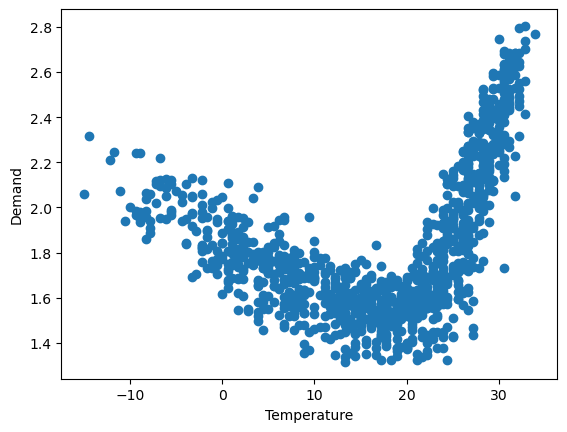

In [8]:
import warnings
warnings.filterwarnings("ignore")

plt.scatter(X, Y)
plt.xlabel("Temperature")
plt.ylabel("Demand")
plt.show()

### Divide the dataset in train and test splits

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=random_state, train_size = 0.7)
print("Training set and test set have {} and {} elements respectively".format(X_train.shape[0], X_test.shape[0]))

Training set and test set have 767 and 329 elements respectively


### Create an evaluation function to compute, print and return the metrics: rmse r2 f-statistic and p-value

In [10]:

"""
y_true - ground truth
y_pred - predictions
n_var - number of predicted variables
n_obs - the number of observations (length of y_true and y_pred)

Returns:
F - F-statistic
p - p-value
"""

def f_test(y_true, y_pred, n_var, n_obs):

    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    n = n_obs
    p = n_var + 1 # number of regression parameters (coefficients + intercept)
    y_true_m = np.mean(y_true)

    SSM = np.sum((y_pred - y_true_m)**2)
    SST = np.sum((y_true - y_true_m)**2)
    SSE = np.sum((y_true - y_pred)**2)

    DFT = n - 1
    DFM = p - 1
    DFE = n - p

    MSM = SSM/DFM
    MSE = SSE/DFE
    MST = SST/DFT

    F = MSM/MSE

    p = 1 - scipy.stats.f.cdf(F, DFM, DFE) #find p-value of F test statistic

    return F, p

def print_eval(X, Y, model):
    pred = model.predict(X)
    
    F, p = f_test(Y, pred, X.shape[1], X.shape[0])
    print("Mean squared error: \t{:.5}".format(mean_squared_error(Y, pred)))
    print("R2 score: \t{:.5}".format(r2_score(Y, pred)))
    print("F statistic: \t{:.5}".format(F))
    print("P value: \t{:.5}".format(p))

    return mean_squared_error(Y, pred), r2_score(Y, pred), F, p




## First experiment
Create a linear model 

Train the model on X_train and y_train 

Evaluate the model on X_test and y_test


In [11]:
results = {}

lmodel = LinearRegression()
lmodel.fit(X_train, Y_train)
results['linear'] = print_eval(X_test, Y_test, lmodel)

Mean squared error: 	0.10165
R2 score: 	0.16809
F statistic: 	44.576
P value: 	1.0503e-10


#### Visualize the prediction of the model 

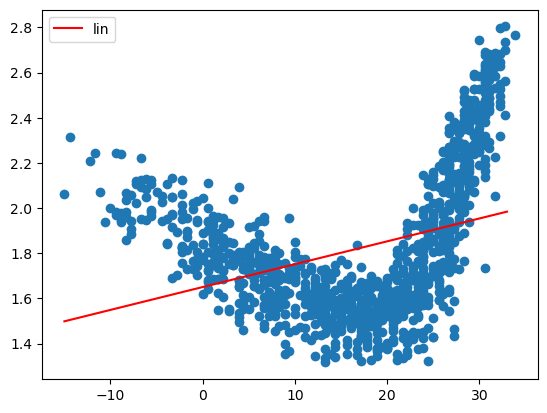

In [12]:
lpred = lmodel.predict(np.arange(min(X.temp), max(X.temp)).reshape(-1,1))
plt.plot(np.arange(min(X.temp), max(X.temp)), lpred, label = 'lin', color = "red" )
plt.legend()
plt.scatter(X, Y)
plt.show()

## Second experiment - Polynomial regression
We can clearly see that the linear regression model cannot really approximate the data distribution.

We can now try with a non linear regression model:
1. Use the sklearn fucntion _PolynomialFeature_ to create a new array of features. Set _degree=2_ and _include_bias=False_
2. Train a Linear regression model with the new features
3. Evaluate the model 
4. Visualize the predicted values of the model

#### Polynomial degree = 2

In [13]:
poly_features = PolynomialFeatures(degree = 2, include_bias=False)
lmodel_2 = LinearRegression()
X_trans = poly_features.fit_transform(X_train)
lmodel_2.fit(X_trans, Y_train)

LinearRegression()

In [14]:
results['pol_2'] = print_eval(poly_features.fit_transform(X_test), Y_test, lmodel_2)

Mean squared error: 	0.033456
R2 score: 	0.72619
F statistic: 	384.89
P value: 	1.1102e-16


[]

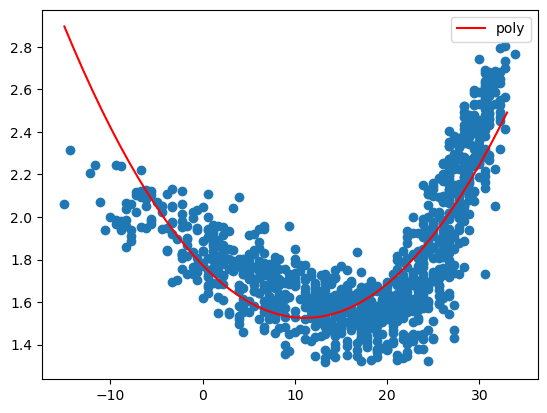

In [16]:
# Create prediction data
X_range = np.arange(min(X.temp), max(X.temp)).reshape(-1, 1)
y_pred_2 = lmodel_2.predict(poly_features.fit_transform(X_range))
plt.plot(X_range, y_pred_2, label = 'poly', color = 'red')
plt.legend()
plt.scatter(X, Y)
plt.plot()


## Third experiment

#### Polynomial degree = 3

In [18]:
poly_features = PolynomialFeatures(degree = 3, include_bias = False)

lmodel_3 = LinearRegression()
X_trans = poly_features.fit_transform(X_train)
lmodel_3.fit(X_trans, Y_train)


LinearRegression()

In [19]:
results["pol_3"] = print_eval(poly_features.fit_transform(X_test), Y_test, lmodel_3)

Mean squared error: 	0.021749
R2 score: 	0.822
F statistic: 	502.32
P value: 	1.1102e-16


[]

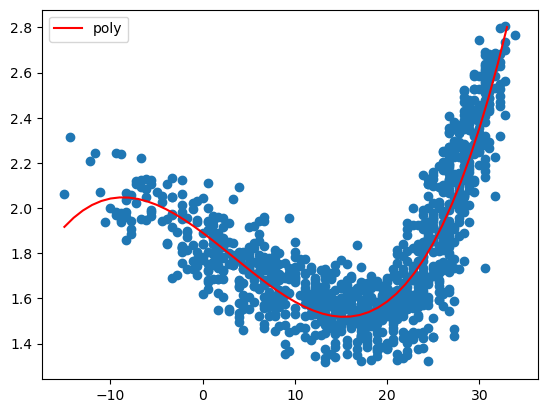

In [20]:
X_range = np.arange(min(X.temp), max(X.temp)).reshape(-1, 1)
y_pred_3 = lmodel_3.predict(poly_features.fit_transform(X_range))
plt.plot(X_range, y_pred_3, label = "poly", color = 'red')
plt.legend()
plt.scatter(X, Y)
plt.plot()

## Compare the performance of the four models